Exploration of word embeddings

In this notebook, examine trained word embeddings, and explore word similarities.

In [1]:
import gensim
import gensim.downloader
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

Download pre-trained embeddings

Download a pre-trained model from the library Gensim. The model was trained on Wikipedia, each word in its vocabulary has 50 dimensions. (For the full model, has 300 dimensions)

In [2]:
# Download embeddings (50 dimensions)
model = gensim.downloader.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


### Word similarity

Find the top `N` most similar word vectors to a given string word starting from the closest one by cosine similarity.

In [30]:
print(model.most_similar("snot", topn=5),"\n")
print(model.most_similar("booger", topn=5),"\n")
print(model.most_similar("corporal", topn=5),"\n")
print(model.most_similar("lexicon", topn=5),"\n")
print(model.most_similar("glabrous", topn=5),"\n")


[('prick', 0.6720711588859558), ('ass', 0.6705361008644104), ('bum', 0.663557767868042), ('siki', 0.6576353907585144), ('smacking', 0.6573067307472229)] 

[('prynne', 0.6701404452323914), ('echidna', 0.6672517657279968), ('eeyore', 0.6557722091674805), ('baloo', 0.6555936336517334), ('leedom', 0.653568685054779)] 

[('cpl.', 0.7356287837028503), ('sergeant', 0.7301747798919678), ('reservist', 0.7060846090316772), ('colonel', 0.6465270519256592), ('sgt.', 0.6310558915138245)] 

[('dictionary', 0.7910244464874268), ('glossary', 0.75330650806427), ('terminology', 0.7522115111351013), ('vocabulary', 0.7434864640235901), ('slang', 0.730318009853363)] 

[('leathery', 0.8038284778594971), ('lanceolate', 0.7908685803413391), ('gray-green', 0.7830264568328857), ('pedicels', 0.7803881764411926), ('obovate', 0.7789346575737)] 



Find the cosine similarity between two words

In [47]:
def go_similar(w1:str,w2:[]):
  print('most similar - synonyms')
  print("\n",model.most_similar(w1, topn=5),"\n")
  for w in w2:
    print(w1, w,model.similarity(w1,w))

go_similar("snot", ["booger", "mucus", "ass"])
go_similar('corporal',["body", "anatomy", "military"])
go_similar("lexicon", ["vocabulary", "knowledge", "language", 'love'])
go_similar("whim", ["impulse", "inclination", "desire", 'forethought'])
go_similar("impulse", ["caprice", "inclination", "desire",'whim'])
go_similar("desire", ["caprice", "disease", 'whim'])



 [('prick', 0.6720711588859558), ('ass', 0.6705361008644104), ('bum', 0.663557767868042), ('siki', 0.6576353907585144), ('smacking', 0.6573067307472229)] 

snot booger 0.5253068
snot mucus 0.31725147
snot ass 0.67053616

 [('cpl.', 0.7356287837028503), ('sergeant', 0.7301747798919678), ('reservist', 0.7060846090316772), ('colonel', 0.6465270519256592), ('sgt.', 0.6310558915138245)] 

corporal body 0.24651246
corporal anatomy 0.053940065
corporal military 0.37234634

 [('dictionary', 0.7910244464874268), ('glossary', 0.75330650806427), ('terminology', 0.7522115111351013), ('vocabulary', 0.7434864640235901), ('slang', 0.730318009853363)] 

lexicon vocabulary 0.74348646
lexicon knowledge 0.41575974
lexicon language 0.6706671
lexicon love 0.2688326

 [('compulsion', 0.664517879486084), ('mumbling', 0.66168612241745), ('pretense', 0.653899073600769), ('sulk', 0.642594039440155), ('unseemly', 0.6312664747238159)] 

whim impulse 0.37075087
whim inclination 0.5049899
whim desire 0.23017405
wh


Today the word is whim...


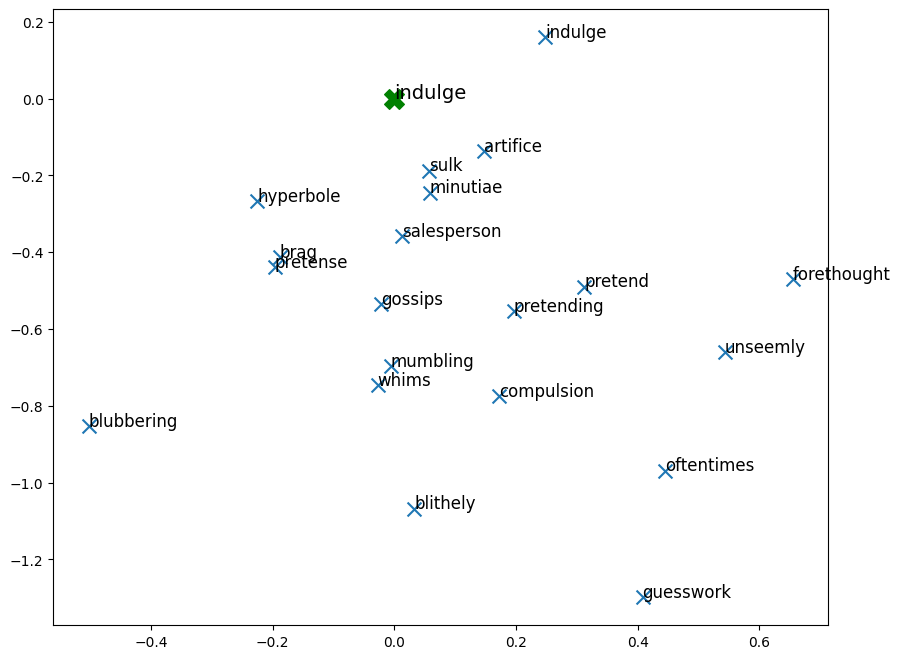

impulse was not found?!?
inclination was not found?!?
vagary was not found?!?
caprice was not found?!?
conceit was not found?!?
craze was not found?!?
desire was not found?!?
disposition was not found?!?
dream was not found?!?
fad was not found?!?
fancy was not found?!?
fantasy was not found?!?
freak was not found?!?
humor was not found?!?
notion was not found?!?
quirk was not found?!?
sport was not found?!?
thought was not found?!?
urge was not found?!?
vision was not found?!?
whimsy was not found?!?

Today the word is corporal...


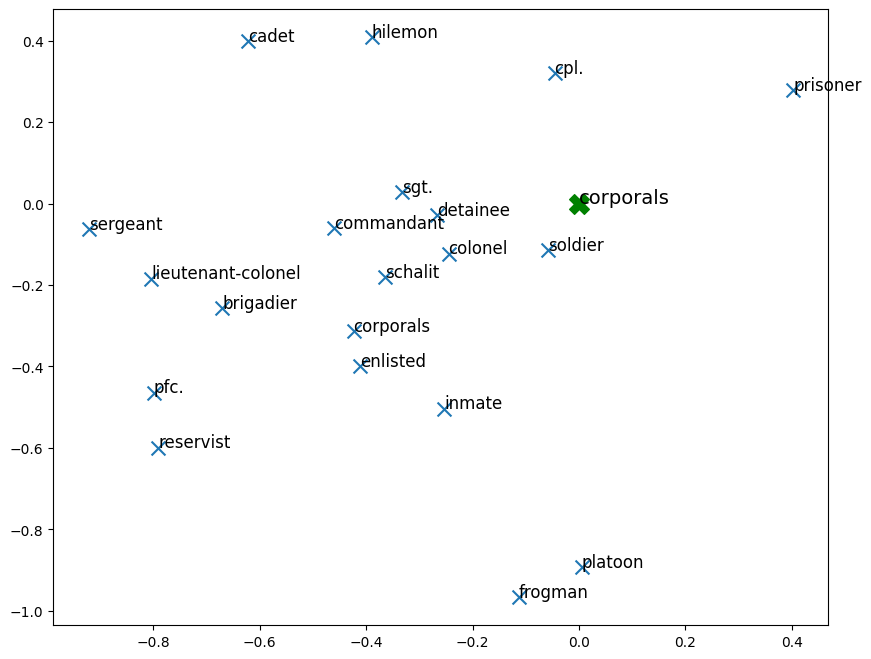

anatomical was not found?!?
gross was not found?!?
human was not found?!?
material was not found?!?
objective was not found?!?
carnal was not found?!?
corporeal was not found?!?
fleshly was not found?!?
fleshy was not found?!?
phenomenal was not found?!?
sensible was not found?!?
somatic was not found?!?
substantial was not found?!?
tangiblepartial was not found?!?
cerebral was not found?!?
immaterial was not found?!?
intangible was not found?!?
mental was not found?!?
spiritual was not found?!?

Today the word is lexicon...


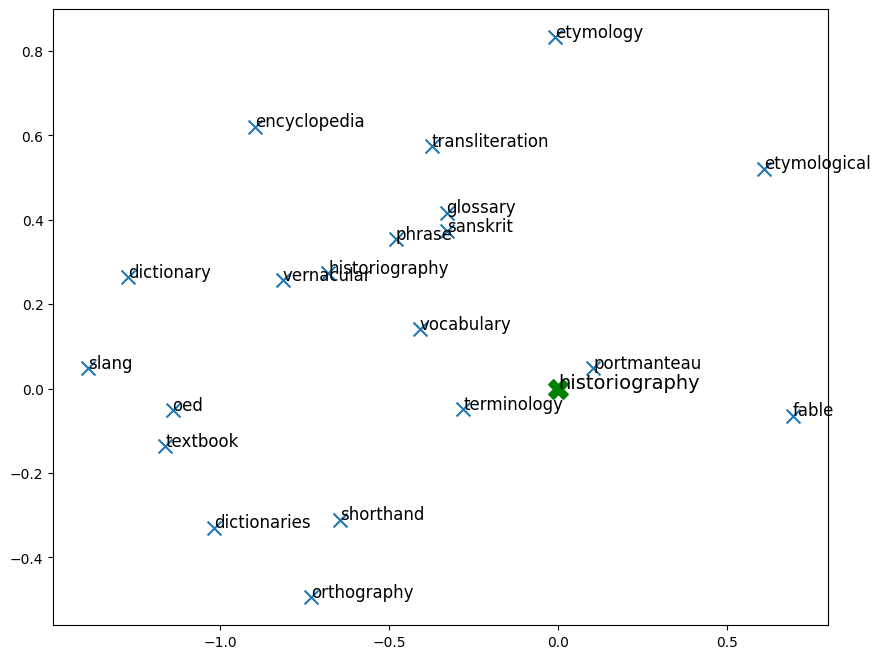


Today the word is snot...


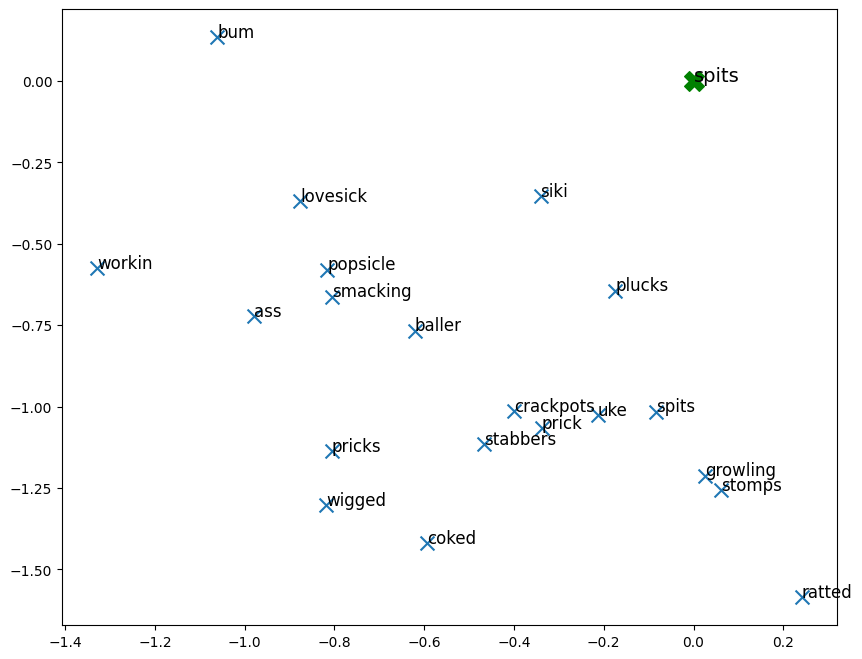

In [39]:
import matplotlib.pyplot as plt

def spinthedie(word_:str,thesaurus=[]):
  # snot - americanized response
  # kipper
  word = word_
  print(f'\nToday the word is {word}...')
  similar_words = model.similar_by_word(word, topn=20)

  # extract the vectors for the similar words
  similar_word_vectors = [model[word] for word, similarity in similar_words]

  # plot the vectors on a 2D graph
  x = [vector[0] for vector in similar_word_vectors]
  y = [vector[1] for vector in similar_word_vectors]
  fig, ax = plt.subplots(figsize = (10,8))
  ax.scatter(x, y, marker='x', s=100) # set marker as 'x' and increase size to 100

  # add labels for the similar words
  for x, y, word_similarity in zip(x, y, similar_words):
      word, similarity = word_similarity
      ax.annotate(word, (x, y), size=12)

  # add the original word at origin
  ax.scatter(0, 0, marker='X', s=200, color='green')
  ax.annotate(word, (0, 0), size=14)

  # show the plot
  plt.show()

  if len(thesaurus) > 0:
    for syn_ in thesaurus:
      if syn_ in similar_words:
        print(f'Thesaurus: {syn_} - {model.similarity(word,syn_)}')
      else:
        print(f'{syn_} was not found?!?')

spinthedie(
    "whim",
     ['impulse','inclination','vagary',  # strong
      'caprice','conceit','craze','desire','disposition','dream','fad',
      'fancy','fantasy','freak','humor','notion','quirk','sport','thought',
      'urge','vision','whimsy'])  # military, anatomical - military it is
spinthedie(
    "corporal",
    ['anatomical','gross','human','material','objective',  #  strong
     'carnal','corporeal','fleshly','fleshy','phenomenal','sensible',
     'somatic','substantial','tangible'
     'partial',  # strong antonyms
     'cerebral','immaterial','intangible','mental','spiritual'
     ]
    )  # military, anatomical - military it is
spinthedie("lexicon")  # is americanized
spinthedie("snot")  # americanized
#spinthedie("kipper")  # americanized
#spinthedie("cold")  # yadda, yadda
#spinthedie("hot")  # yadda, yadda
#spinthedie("reap")
